## K-Means Clustering Algorithm

**K-Means** is one of the most widely used algorithms in machine learning, particularly in **unsupervised learning**. The goal of K-Means is to partition the dataset into $K$ distinct, non-overlapping clusters, where each cluster is represented by its center (centroid).



### Steps of the K-Means Algorithm:

1. **Initialization**: Randomly select $K$ data points as the initial cluster centroids.
2. **Assignment**: Assign each data point to the nearest centroid using Euclidean distance.
3. **Update**: Compute new centroids as the mean of the data points assigned to each cluster.
4. **Repeat** steps 2 and 3 until the centroids no longer change significantly (or for a fixed number of iterations).



### Objective Function:

The K-Means algorithm aims to minimize the total within-cluster variance, which is calculated as:

$$
J = \sum_{i=1}^{K} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

- $C_i$: the $i$-th cluster  
- $\mu_i$: the centroid of cluster $i$  
- $\| x - \mu_i \|^2$: the squared Euclidean distance between point $x$ and its cluster centroid



### Advantages:
- Simple and fast
- Easy to understand and implement

### Disadvantages:
- Requires specifying the number of clusters $K$ in advance
- Sensitive to initial centroid selection
- Sensitive to outliers
- Works best for spherical-shaped clusters



___

## Silhouette Coefficient – Clustering Evaluation Metric

The **Silhouette Coefficient** is a popular metric for evaluating the quality of clustering results, especially in algorithms like K-Means. It measures how similar a data point is to its own cluster compared to other clusters, and assigns each sample a score between $-1$ and $1$.



### How It’s Computed for a Single Sample:

For a given data point $i$, we compute two quantities:

- $a(i)$: the average distance from $i$ to all other points **in the same cluster**
- $b(i)$: the average distance from $i$ to all points **in the nearest neighboring cluster**

The silhouette score for point $i$ is defined as:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$



### Interpretation of the Score:

- If $s(i) \approx 1$ → the sample is well clustered (far from other clusters)
- If $s(i) \approx 0$ → the sample lies between two clusters (on the decision boundary)
- If $s(i) < 0$ → the sample is likely misclassified (closer to a different cluster)



### Overall Score:

The overall **Silhouette Score** is the **mean** of $s(i)$ over all data points:

- A **higher score** (e.g., > 0.5) indicates better-defined clusters
- A **low or negative score** suggests poor clustering or overlapping clusters



### Advantages:
- No need for ground truth labels
- Useful for choosing the optimal number of clusters



### Usage in This Notebook:

In this notebook, we use the Silhouette Score to evaluate clustering performance for different values of $K$ (number of clusters). The optimal number of clusters will be the one that yields the highest average silhouette score.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

In [3]:
df = pd.read_csv('/mnt/e/Term 3/Machin-Learning/Projects/09 pro/data/dataset-Q6.csv')

In [4]:
df.head()

,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


In [5]:
df.tail()

,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
315,88.33,16.33,75.73,139.0,1.84,3.67,135.19,3348.931034
316,64.40,16.60,76.00,168.0,2.21,3.60,145.69,3418.850575
317,64.60,17.60,116.80,271.2,2.32,3.80,147.24,3651.586207
318,58.80,14.80,86.40,180.6,2.09,2.20,156.32,3487.931034
319,62.60,16.33,93.07,206.6,2.21,3.20,157.61,3605.310345


In [6]:
k_range = range(2, 11)
silhouette_scores = []

In [13]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

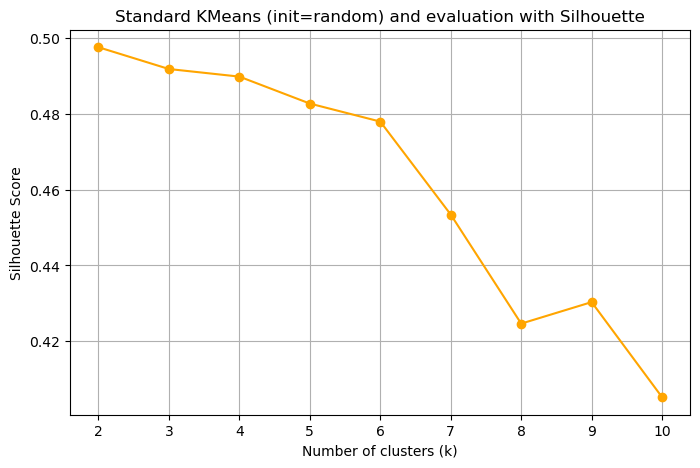

Optimal number of clusters with standard KMeans: 2


In [14]:
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Standard KMeans (init=random) and evaluation with Silhouette')
plt.grid(True)
plt.show()

# Find the optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters with standard KMeans: {optimal_k}')


## K-Means++ Algorithm

**K-Means++** is an improved version of the standard K-Means algorithm that addresses the problem of **random initialization** of cluster centers. It provides a smarter way to select initial cluster centroids to achieve faster convergence and better clustering results.



### Problem with Standard K-Means:
- Randomly choosing initial centers can cause the algorithm to get stuck in **poor local minima**.
- The final results may be unstable and of low quality.



### Main Idea of K-Means++:
- The first centroid is chosen randomly from the data points.
- Subsequent centroids are chosen to be **farther away** from the existing centers.
- This ensures that initial centers are **spread out and more optimal**.



### Steps for Choosing Initial Centers in K-Means++:

1. Randomly select one data point as the first centroid.
2. For each remaining point \( x \), compute the distance \( D(x) \) to the nearest already chosen centroid.
3. Choose the next centroid with probability proportional to \( D(x)^2 \) (points farther away have a higher chance).
4. Repeat until \( K \) centroids are chosen.



### Advantages:

- Faster convergence compared to standard K-Means
- Reduced chance of poor local minima
- More stable and accurate results



### Usage:

In this notebook, we use K-Means++ to initialize cluster centers and evaluate clustering quality using the Silhouette Score.


In [20]:
k_range = range(2, 11)
silhouette_scores = []

In [21]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

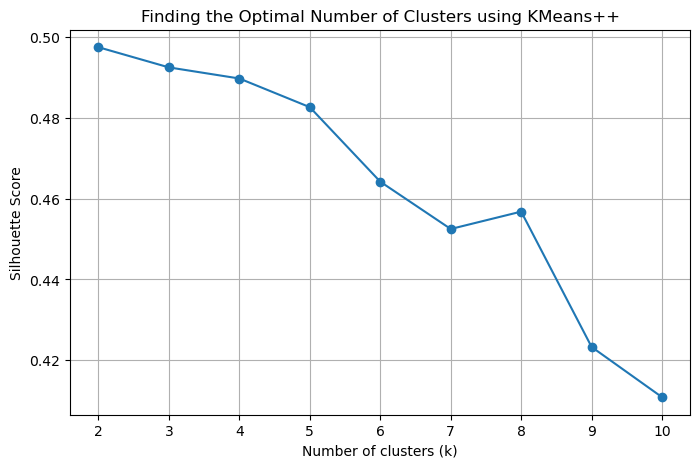

Optimal number of clusters: 2


In [22]:
# Plot the Silhouette Score for different values of k
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Finding the Optimal Number of Clusters using KMeans++')
plt.grid(True)
plt.show()

# Determine the optimal number of clusters
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')

# With Standardization

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

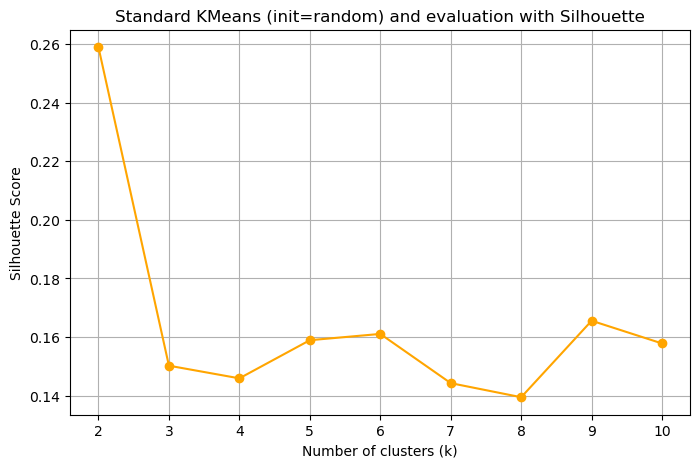

Optimal number of clusters with standard KMeans: 2


In [26]:
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Standard KMeans (init=random) and evaluation with Silhouette')
plt.grid(True)
plt.show()

# Find the optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters with standard KMeans: {optimal_k}')

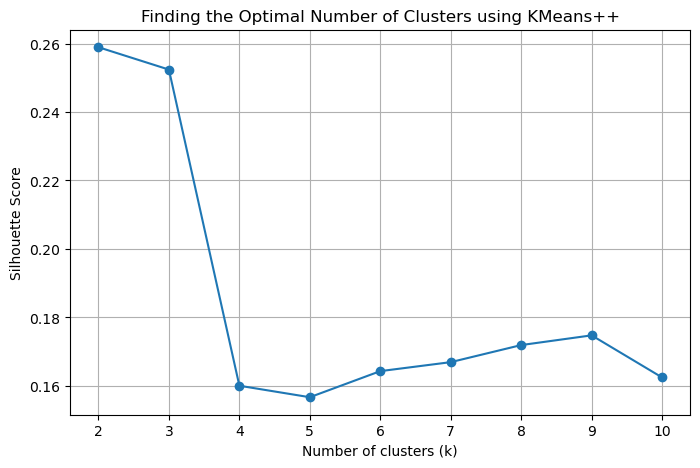

Optimal number of clusters: 2


In [27]:
k_range = range(2, 11)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X=X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Score for different values of k
plt.figure(figsize=(8,5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Finding the Optimal Number of Clusters using KMeans++')
plt.grid(True)
plt.show()

# Determine the optimal number of clusters
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters: {optimal_k}')